<a href="https://colab.research.google.com/github/Romek12345/prosta_analiza_R/blob/main/Analiza_danych_odkamieniania_grunt%C3%B3w_rolnych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


{Pierwsze 2/3 linijki kodu srodowisko python, instalacja pip install nbconvert -> !jupyter nbconvert --to html /sciezka/do/pliku}Instalacja pakietów + załadowanie

In [2]:
install.packages("readxl")
install.packages("dplyr")
install.packages("rmarkdown")
install.packages("ggplot2")
library(readxl)
library(dplyr)
library(rmarkdown)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
file_path <- "/content/drive/MyDrive/naR.xlsx"
df <- read_excel(file_path)

Podstawowe dane o analizowanej tabeli.

In [4]:
summary(df)

    gmina               imie              adres                Rok      
 Length:389         Length:389         Length:389         Min.   :2022  
 Class :character   Class :character   Class :character   1st Qu.:2022  
 Mode  :character   Mode  :character   Mode  :character   Median :2022  
                                                          Mean   :2023  
                                                          3rd Qu.:2023  
                                                          Max.   :2024  
   nr_sprawy      lokalizacja         nr_dzialki         pow_kamieni   
 Min.   :  1.00   Length:389         Length:389         Min.   : 0.50  
 1st Qu.: 40.00   Class :character   Class :character   1st Qu.: 4.30  
 Median : 75.00   Mode  :character   Mode  :character   Median : 6.62  
 Mean   : 89.39                                         Mean   : 6.51  
 3rd Qu.:129.00                                         3rd Qu.: 9.41  
 Max.   :231.00                                         M

In [5]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
df$wartosc_kamieni <- as.numeric(df$wartosc_kamieni)

Warning message:
“NAs introduced by coercion”


In [8]:
df$uwagi <- NULL
df$tel <- NULL
df$nr_sprawy <- NULL

Stworzenie kolumny "numer porzadkowy" i przesuniecie go jako 1 kolumna.

In [9]:
df <- df %>%
  mutate(numer_porzadkowy = row_number())
df$numer_porzadkowy <- seq_len(nrow(df))
df <- df %>%
    select(numer_porzadkowy, everything())

In [11]:
install.packages("digest")
library(digest)
# zaszyfrowanie kolumny imie
df$imie_szyfrowane <- sapply(df$imie, function(x) digest(x, algo = "md5"))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
df$imie <- NULL
df$imie_encrypted <- NULL
df$nr_dzialki <- NULL

In [18]:
summary(df)

 numer_porzadkowy    gmina              adres                Rok      
 Min.   :  1      Length:389         Length:389         Min.   :2022  
 1st Qu.: 98      Class :character   Class :character   1st Qu.:2022  
 Median :195      Mode  :character   Mode  :character   Median :2022  
 Mean   :195                                            Mean   :2023  
 3rd Qu.:292                                            3rd Qu.:2023  
 Max.   :389                                            Max.   :2024  
                                                                      
 lokalizacja         pow_kamieni    wartosc_kamieni imie_szyfrowane   
 Length:389         Min.   : 0.50   Min.   : 1280   Length:389        
 Class :character   1st Qu.: 4.30   1st Qu.: 7290   Class :character  
 Mode  :character   Median : 6.62   Median :11040   Mode  :character  
                    Mean   : 6.51   Mean   :12335                     
                    3rd Qu.: 9.41   3rd Qu.:15782                     
      

In [19]:
head(df)

numer_porzadkowy,gmina,adres,Rok,lokalizacja,pow_kamieni,wartosc_kamieni,imie_szyfrowane
<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,Rutka Taratak,Pobondzie 34 16-406 Rutka Tartak,2024,Pobondzie,1.82,4978,a27edefe4e377d41b7a2037a4cda723a
2,Przerośl,Morgi 5 16-427 Morgi,2024,Morgi,9.47,19320,3961a23c80534906193aa65c8b93d8fb
3,Suwałki,Osowa 19 16-402 Suwałki,2024,Osowa,3.20,8640,3515fecfb8dc3ad839ac516b4c5f9e81
4,Krypno,Bajki Zalesie 16 19-111 Krypno Kościelne,2024,Bajki Zalesie,6.65,9970,f9adcec5d60b438b89b59e2925e999f2
5,Filipów,Czarne 40 16-424 Filipów,2024,Czarne,4.90,7840,2d60083371777681705df2d66308f45e
6,Suwałki,Potasznia 20 16-402 Suwałki,2024,Potasznia,5.58,8930,4af2a74b333042a3ff48ee449219a3af


In [20]:
head(df[, c("numer_porzadkowy", "gmina", "adres", "lokalizacja", "pow_kamieni", "wartosc_kamieni")], n = 6)
# Displays the first 6 rows of selected columns

numer_porzadkowy,gmina,adres,lokalizacja,pow_kamieni,wartosc_kamieni
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Rutka Taratak,Pobondzie 34 16-406 Rutka Tartak,Pobondzie,1.82,4978
2,Przerośl,Morgi 5 16-427 Morgi,Morgi,9.47,19320
3,Suwałki,Osowa 19 16-402 Suwałki,Osowa,3.20,8640
4,Krypno,Bajki Zalesie 16 19-111 Krypno Kościelne,Bajki Zalesie,6.65,9970
5,Filipów,Czarne 40 16-424 Filipów,Czarne,4.90,7840
6,Suwałki,Potasznia 20 16-402 Suwałki,Potasznia,5.58,8930


In [21]:
suma_wartosci_lokalizacji <- df %>%
  group_by(lokalizacja) %>%
  summarise(suma_wartosc_kamieni = sum(wartosc_kamieni, na.rm = TRUE)) %>%
  arrange(desc(suma_wartosc_kamieni))
head(suma_wartosci_lokalizacji)

lokalizacja,suma_wartosc_kamieni
<chr>,<dbl>
Bosse,170614
Półkoty,101064
Szurpiły,93350
Krejwińce,86017
Pomiany,72829
Garbas Drugi,72540


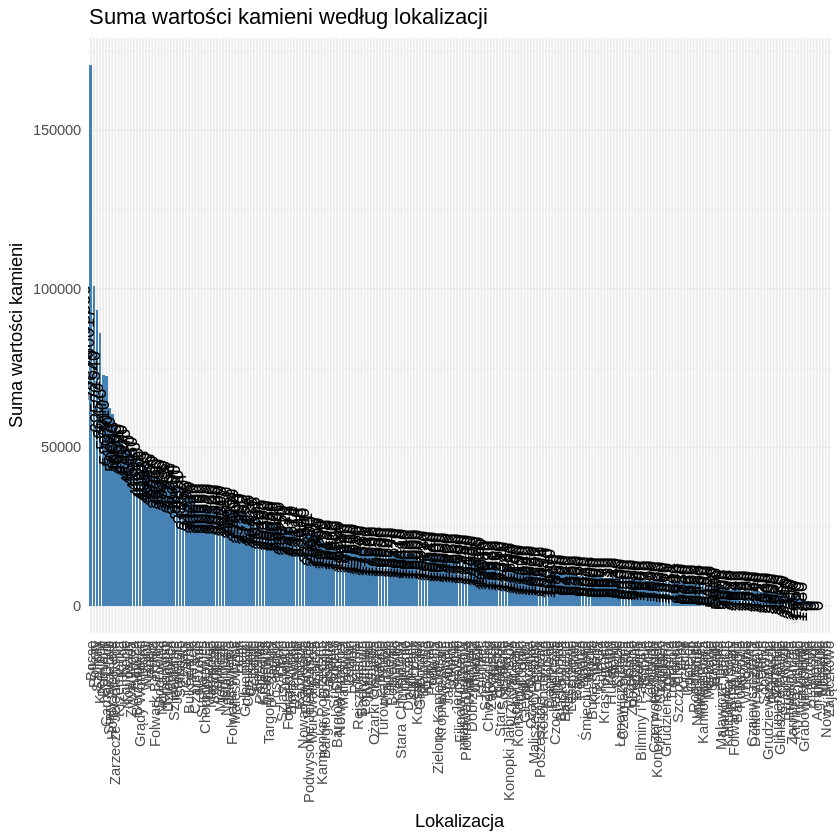

In [22]:
ggplot(suma_wartosci_lokalizacji, aes(x = reorder(lokalizacja, -suma_wartosc_kamieni), y = suma_wartosc_kamieni)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Suma wartości kamieni według lokalizacji",
       x = "Lokalizacja",
       y = "Suma wartości kamieni") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  geom_text(aes(label = suma_wartosc_kamieni), vjust = -0.5, angle = 90)


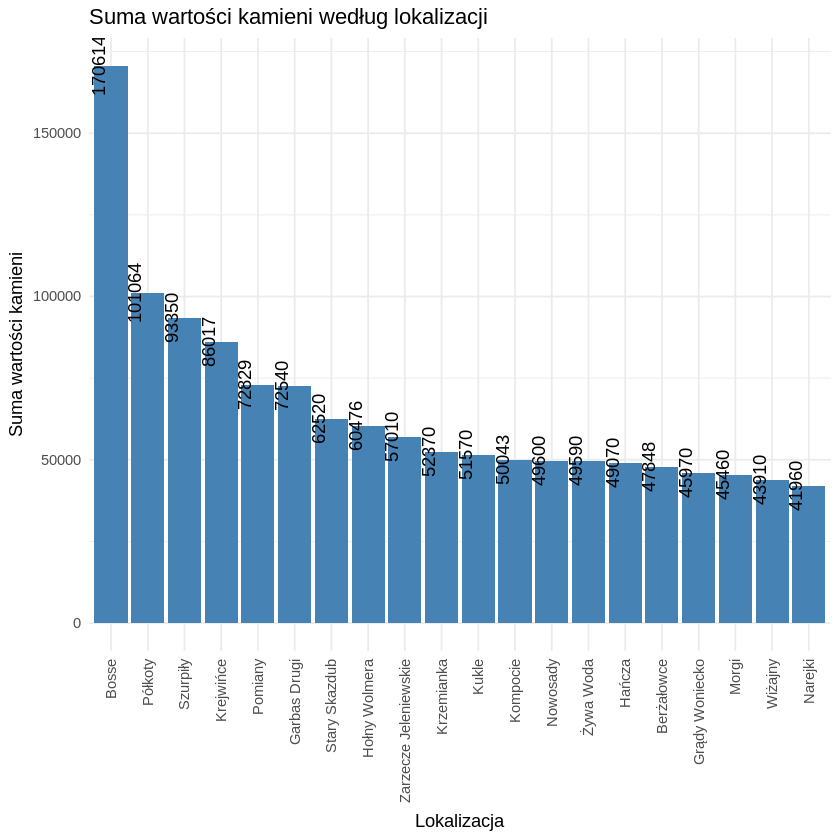

In [23]:
top_20 <- head(suma_wartosci_lokalizacji, 20)
ggplot(top_20, aes(x = reorder(lokalizacja, -suma_wartosc_kamieni), y = suma_wartosc_kamieni)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Suma wartości kamieni według lokalizacji",
       x = "Lokalizacja",
       y = "Suma wartości kamieni") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  geom_text(aes(label = suma_wartosc_kamieni), vjust = -0.5, angle = 90)


Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


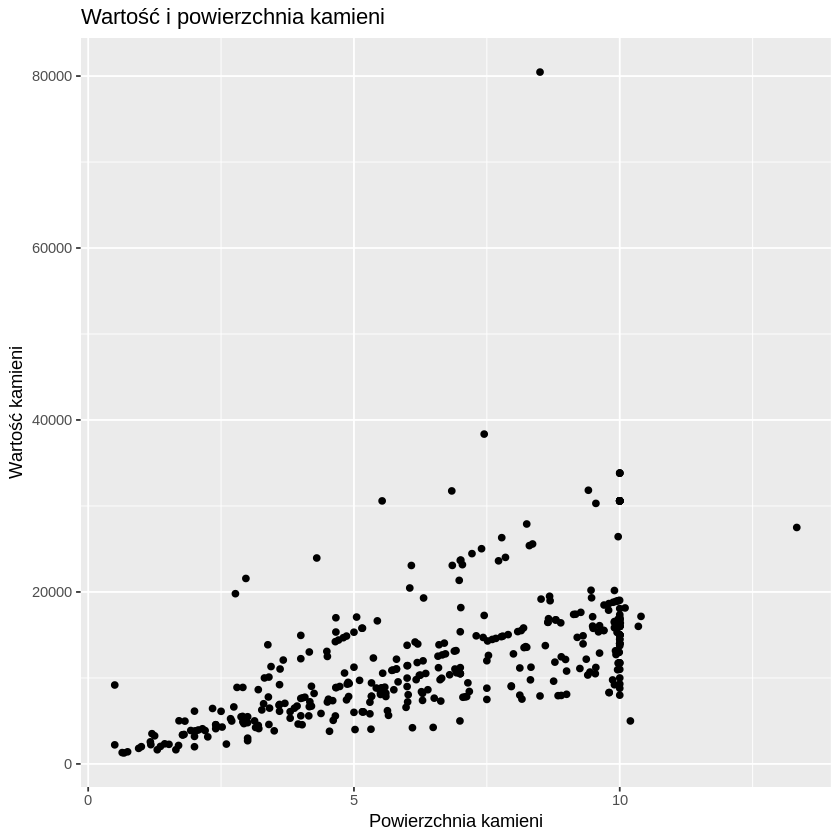

In [24]:
ggplot(df, aes(x = pow_kamieni, y = wartosc_kamieni)) +
  geom_point() +
  labs(title = "Wartość i powierzchnia kamieni",
       x = "Powierzchnia kamieni", y = "Wartość kamieni")


Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


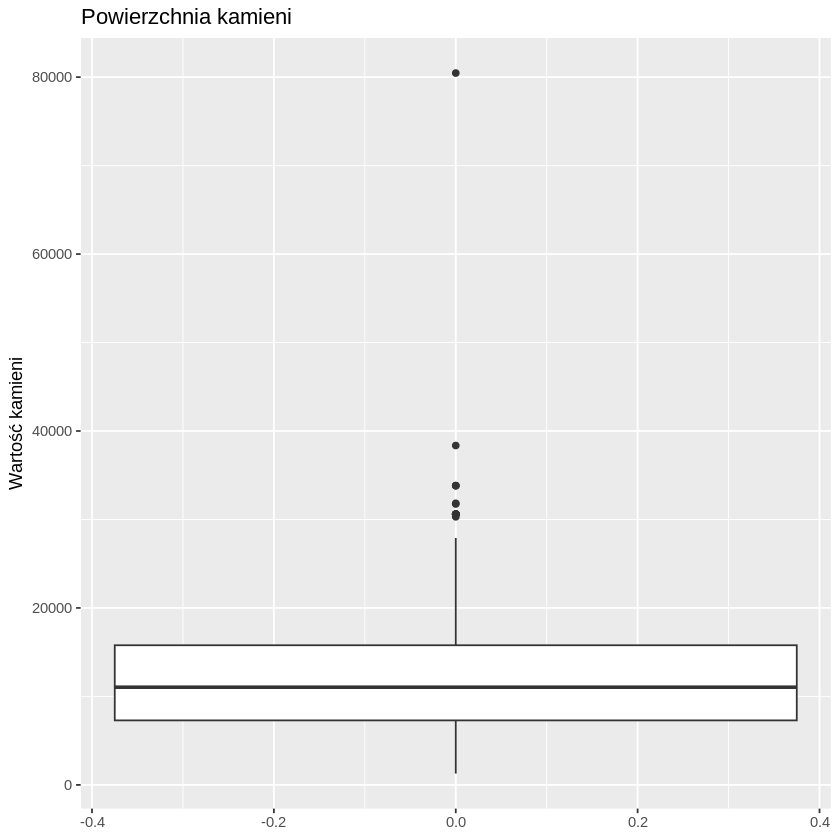

In [25]:
ggplot(df, aes(y = wartosc_kamieni)) +
  geom_boxplot() +
  labs(title = "Powierzchnia kamieni", y = "Wartość kamieni")


In [30]:
# wypelnienie pustych NA
df[df == ""] <- NA

# usuniecie wierszy z NA
df <- na.omit(df)


In [35]:
head(suma_wartosci_lokalizacji, 9)


lokalizacja,suma_wartosc_kamieni
<chr>,<dbl>
Bosse,170614
Półkoty,101064
Szurpiły,93350
Krejwińce,86017
Pomiany,72829
Garbas Drugi,72540
Stary Skazdub,62520
Hołny Wolmera,60476
Zarzecze Jeleniewskie,57010


In [36]:
# Convert 'wartosc_kamieni' to numeric before summarizing
df$wartosc_kamieni <- as.numeric(df$wartosc_kamieni)

suma_wartosci <- df %>%
  group_by(gmina) %>%
  summarise(suma_wartosc_kamieni = sum(wartosc_kamieni, na.rm = TRUE)) %>%
  arrange(desc(suma_wartosc_kamieni))

In [38]:
head(suma_wartosci)

gmina,suma_wartosc_kamieni
<chr>,<dbl>
Sejny,916673
Jeleniewo,633668
Puńsk,302323
Filipów,258460
Przerośl,202770
Bargłów Kościelny,193200


In [39]:
filtered_data <- suma_wartosci %>%
  slice(-1:-2)

Dwie kropki poza boxem to gmina Sejny i Jeleniewo. Czarna kreska to mediana.

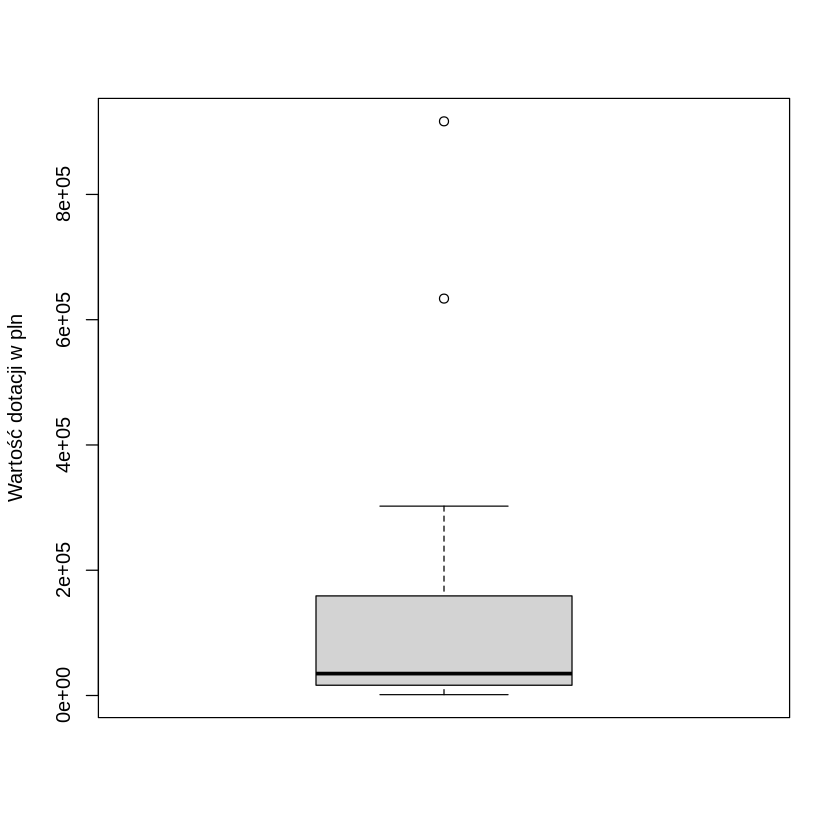

In [40]:
boxplot(suma_wartosci$suma_wartosc_kamieni,
        ylab = "Wartość dotacji w pln")

In [54]:
summary(suma_wartosci$suma_wartosc_kamieni)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1320   16660   34960  101900  155807  916673 

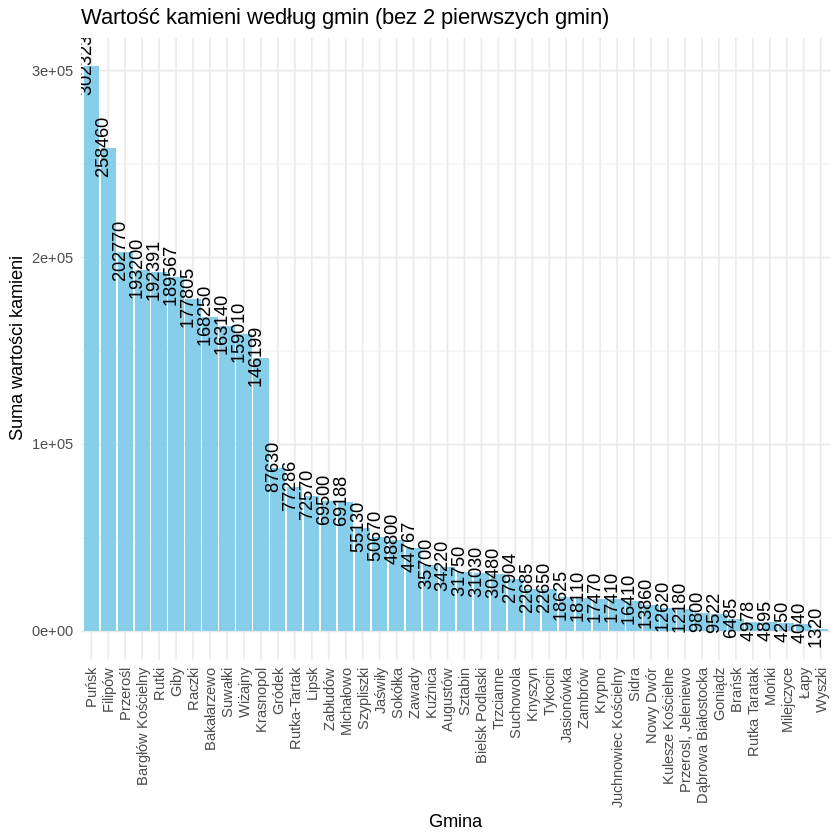

In [41]:
ggplot(filtered_data, aes(x = reorder(gmina, -suma_wartosc_kamieni), y = suma_wartosc_kamieni)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Wartość kamieni według gmin (bez 2 pierwszych gmin)",
       x = "Gmina",
       y = "Suma wartości kamieni") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  geom_text(aes(label = suma_wartosc_kamieni), vjust = 0, angle = 90)

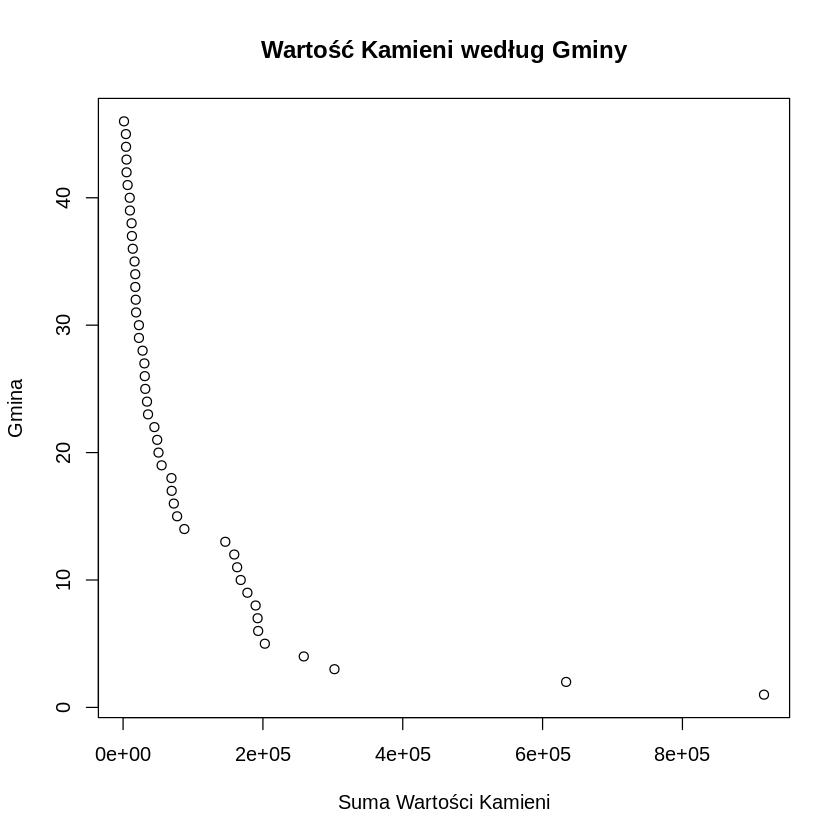

In [42]:
suma_wartosci$gmina <- factor(suma_wartosci$gmina, levels = suma_wartosci$gmina)

# Now create the plot
plot(suma_wartosci$suma_wartosc_kamieni, suma_wartosci$gmina,
     xlab = "Suma Wartości Kamieni",
     ylab = "Gmina",
     main = "Wartość Kamieni według Gminy")

In [50]:
df


numer_porzadkowy,gmina,adres,Rok,lokalizacja,pow_kamieni,wartosc_kamieni,imie_szyfrowane
<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,Rutka Taratak,Pobondzie 34 16-406 Rutka Tartak,2024,Pobondzie,1.82,4978,a27edefe4e377d41b7a2037a4cda723a
2,Przerośl,Morgi 5 16-427 Morgi,2024,Morgi,9.47,19320,3961a23c80534906193aa65c8b93d8fb
3,Suwałki,Osowa 19 16-402 Suwałki,2024,Osowa,3.20,8640,3515fecfb8dc3ad839ac516b4c5f9e81
4,Krypno,Bajki Zalesie 16 19-111 Krypno Kościelne,2024,Bajki Zalesie,6.65,9970,f9adcec5d60b438b89b59e2925e999f2
5,Filipów,Czarne 40 16-424 Filipów,2024,Czarne,4.90,7840,2d60083371777681705df2d66308f45e
6,Suwałki,Potasznia 20 16-402 Suwałki,2024,Potasznia,5.58,8930,4af2a74b333042a3ff48ee449219a3af
7,Krypno,Długołęka 95 19-111 Krypno Kościelne,2024,Dębina,7.50,7500,dd768c98f507acdd46b815de3ed0a500
8,Przerośl,Rakówek 23 16-427 Rakówek,2024,Rakówek,4.89,9490,7f1ab79cbf49d76e7e829e950e993352
9,Bargłów Kościelny,Pomiany 49 16-320 Bargłów Kościelny,2024,Pomiany,1.30,1650,f88782b8f85264b7b0b8869c6a795bfa


Zsumowana wartosc kamieni podzielona na powierzchnie, pokazuje średni wartość odkamienienia 1 ha gruntu na jaka wyceniaja rolnicy.

In [52]:
suma_wartosc_kamieni <- sum(df$wartosc_kamieni, na.rm = TRUE)
suma_pow_kamieni <- sum(df$pow_kamieni, na.rm = TRUE)


wynik <- suma_wartosc_kamieni / suma_pow_kamieni
wynik

[1] 1894.67

In [61]:
# 1. Jaki adres miał najwięcej pow_kamieni
adres_najwiecej_pow_kamieni <- df %>%
  group_by(adres) %>%
  summarise(suma_pow_kamieni = sum(pow_kamieni, na.rm = TRUE)) %>%
  arrange(desc(suma_pow_kamieni)) %>%
  slice_head(n=10)

# Wyświetlenie wyniku
print(adres_najwiecej_pow_kamieni)

# A tibble: 10 × 2
   adres                                            suma_pow_kamieni
   <chr>                                                       <dbl>
 1 "ul. Białostocka 51\r\n16-150 Suchowola"                     46.8
 2 "Dobrzyniówka 63\r\n16-060 Zabłudów"                         30  
 3 "Nowa Wola 67\r\n16-050 Michałowo"                           30.0
 4 "Jemieliste 36\r\n16-424 Filipów"                            29.8
 5 "Krzemianka 13\r\n16-404 Jeleniewo"                          27.5
 6 "Krzemianka 14\r\n16-404 Jeleniewo"                          22.8
 7 "Podwysokie Jeleniewskie 13\r\n16-404 Jeleniewo"             20.6
 8 "Targonie Krytuły 9\r\n16-075 Zawady"                        20.4
 9 "Bosse 4\r\n16-500 Sejny"                                    20  
10 "Jaświłki 8\r\n19-124 Jaświły"                               20  


In [63]:
# 3. W którym roku było najwięcej pow_kamieni
rok_najwiecej_pow_kamieni <- df %>%
  group_by(Rok) %>%
  summarise(suma_pow_kamieni = sum(pow_kamieni, na.rm = TRUE)) %>%
  arrange(desc(suma_pow_kamieni)) %>%
  slice_head(n = 10)

# Wyświetlenie wyniku
print(rok_najwiecej_pow_kamieni)

# A tibble: 3 × 2
    Rok suma_pow_kamieni
  <dbl>            <dbl>
1  2022            1265.
2  2023             693.
3  2024             516.


In [65]:
rok_najwieksza_wartosc_kamieni <- df %>%
  group_by(Rok) %>%
  summarise(suma_wartosc_kamieni = sum(wartosc_kamieni, na.rm = TRUE)) %>%
  arrange(desc(suma_wartosc_kamieni)) %>%
  slice_head(n=10)

# Wyświetlenie wyniku
print(rok_najwieksza_wartosc_kamieni)

# A tibble: 3 × 2
    Rok suma_wartosc_kamieni
  <dbl>                <dbl>
1  2022              2539885
2  2023              1262906
3  2024               884600


In [70]:
liczba_wnioskow <- df %>%
  group_by(Rok) %>%
  summarise(liczba_rekordow = n()) %>%
  arrange(desc(Rok))

print(liczba_wnioskow)

# A tibble: 3 × 2
    Rok liczba_rekordow
  <dbl>           <int>
1  2024              85
2  2023              96
3  2022             199


In [76]:
summary(df)

 numer_porzadkowy    gmina              adres                Rok      
 Min.   :  1.00   Length:380         Length:380         Min.   :2022  
 1st Qu.: 95.75   Class :character   Class :character   1st Qu.:2022  
 Median :190.50   Mode  :character   Mode  :character   Median :2022  
 Mean   :191.18                                         Mean   :2023  
 3rd Qu.:285.25                                         3rd Qu.:2023  
 Max.   :389.00                                         Max.   :2024  
 lokalizacja         pow_kamieni     wartosc_kamieni imie_szyfrowane   
 Length:380         Min.   : 0.500   Min.   : 1280   Length:380        
 Class :character   1st Qu.: 4.237   1st Qu.: 7290   Class :character  
 Mode  :character   Median : 6.610   Median :11040   Mode  :character  
                    Mean   : 6.510   Mean   :12335                     
                    3rd Qu.: 9.418   3rd Qu.:15782                     
                    Max.   :13.330   Max.   :80460                     

In [77]:
system("apt-get install -y pandoc")

In [78]:
rmarkdown::render("raport.Rmd")

Warning message in normalizePath(x, winslash = winslash, mustWork = must_work):
“path[1]="raport.Rmd": No such file or directory”


ERROR: Error in abs_path(input): The file 'raport.Rmd' does not exist.
